In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("/home/hemanth/Documents/XGBoosting/forestfires.csv")

In [3]:
data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [4]:
data.tail()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00
516,6,3,nov,tue,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,0.00


In [7]:
data.isna().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [9]:
data.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [10]:
#let's name the categorical and numeical attributes 
categorical_attributes = list(data.select_dtypes(include=['object']).columns)
numerical_attributes = list(data.select_dtypes(include=['float64', 'int64']).columns)
print('categorical_attributes:', categorical_attributes)
print('numerical_attributes:', numerical_attributes)



categorical_attributes: ['month', 'day']
numerical_attributes: ['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']


In [11]:
#Here we face an uniqe issue where a few months have only 1 or 2 data points. I chose to get rid of these so that the glm models
#can handle the tests properly. Let me know how you would have hanlded.
print('months', data.month.value_counts(), sep='\n')
print('\n')
print('days', data.day.value_counts(), sep='\n')

months
aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
dec      9
apr      9
jan      2
may      2
nov      1
Name: month, dtype: int64


days
sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: day, dtype: int64


In [13]:
months_to_remove = ['nov','jan','may']
forest_fire = data.drop(data[data.month.isin(months_to_remove)].index ,axis=0)
forest_fire.month.value_counts()



aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
dec      9
apr      9
Name: month, dtype: int64

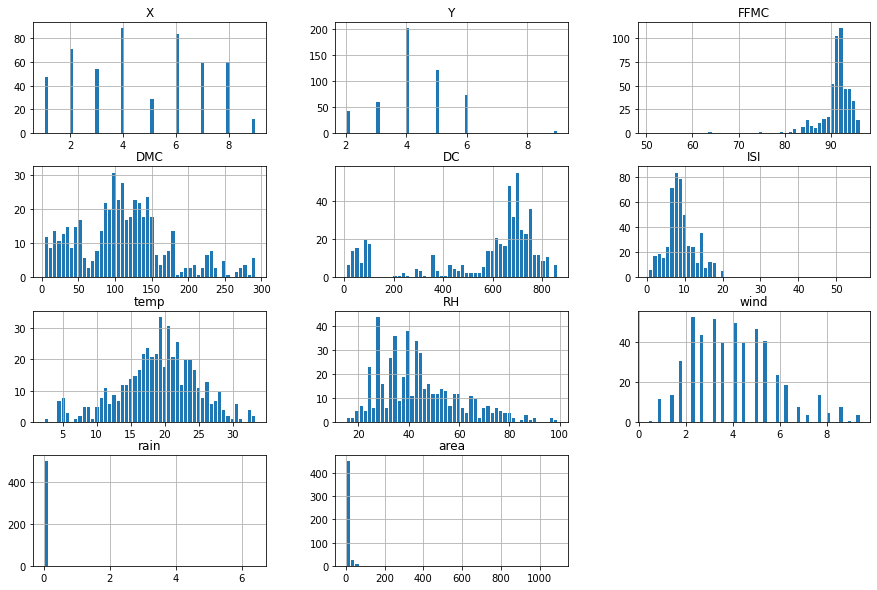

In [14]:
#visualizing distributions 
forest_fire.hist(bins=50, figsize=(15,10), ec='w')
plt.show()

Text(800, 100, 'max: 1090.84')

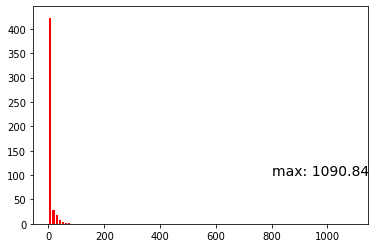

In [15]:
plt.hist(forest_fire.area, ec='w', bins=100, color='red')
plt.text(800,100, 'max: '+str(forest_fire.area.max()), color='black', fontsize=14)
#Burnt area attribute ranges from 0 to 1091.

In [16]:
#Grouping the the burnt area to get a better understanding
forest_fire['area_cat'] = pd.cut(forest_fire['area'], bins=[0,5, 10, 50, 100, 1100], include_lowest=True, 
                                 labels=['0-5', '5-10', '10-50', '50-100', '>100'])
forest_fire.area_cat.value_counts()


0-5       362
10-50      70
5-10       56
50-100     13
>100       11
Name: area_cat, dtype: int64

In [17]:
#Interquartile range
Q1 = forest_fire.area.quantile(.25)
Q3 = forest_fire.area.quantile(.75)
IQR = 1.5*(Q3-Q1)
IQR

9.85875

In [18]:
#we are loosing quite a number of data points in already a small data set if we remove all outliers
forest_fire.query('(@Q1 - 1.5 * @IQR) <= area <= (@Q3 + 1.5 * @IQR)').area_cat.value_counts(sort=False)

0-5       362
5-10       56
10-50      37
50-100      0
>100        0
Name: area_cat, dtype: int64

In [19]:
#remove outliers
forest_fire.drop(forest_fire[forest_fire.area>100].index,axis=0, inplace=True)
forest_fire.area_cat.value_counts()

0-5       362
10-50      70
5-10       56
50-100     13
>100        0
Name: area_cat, dtype: int64

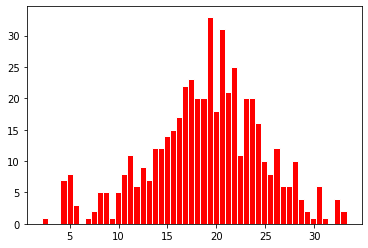

In [20]:
#Let's understand what temp ranges we have here.
plt.hist(forest_fire.temp, ec='w', bins=50, color='red')
plt.show()

In [21]:
forest_fire['temp_bins'] = pd.cut(forest_fire.temp, bins=[0, 15, 20, 25, 40], include_lowest=True, 
                                 labels=['0-15', '15-20', '20-25', '>25'])
forest_fire.temp_bins.value_counts(sort=False)
#so we have from very cold 0-15 degrees to hot >25 degree.


0-15     109
15-20    167
20-25    163
>25       62
Name: temp_bins, dtype: int64

In [22]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(forest_fire.values, forest_fire.temp_bins.values):
    st_train_set = forest_fire.iloc[train_index]
    st_test_set = forest_fire.iloc[test_index]


In [23]:
#this works like magic.
print(st_test_set.temp_bins.value_counts(sort=False)/len(st_test_set), sep='\n')
print(forest_fire.temp_bins.value_counts(sort=False)/len(forest_fire), sep='\n')



0-15     0.217822
15-20    0.336634
20-25    0.326733
>25      0.118812
Name: temp_bins, dtype: float64
0-15     0.217565
15-20    0.333333
20-25    0.325349
>25      0.123752
Name: temp_bins, dtype: float64


In [24]:
#now lets drop the area and temp categories 
for _ in (st_train_set, st_test_set):
    _.drop(['area_cat','temp_bins'], axis=1, inplace=True)
    
forest_fire = st_train_set.copy()
forest_fire.head()

/home/hemanth/.local/lib/python3.8/site-packages/pandas/core/frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
359,1,4,sep,fri,92.5,122.0,789.7,10.2,21.1,39,2.2,0.0,8.12
314,4,4,sep,wed,92.6,115.4,777.1,8.8,19.7,41,1.8,0.0,1.58
203,8,6,oct,wed,91.4,37.9,673.8,5.2,20.2,37,2.7,0.0,13.70
319,5,4,sep,thu,92.8,119.0,783.5,7.5,21.6,28,6.3,0.0,4.41
51,4,3,aug,sun,90.2,99.6,631.2,6.3,21.5,34,2.2,0.0,0.00


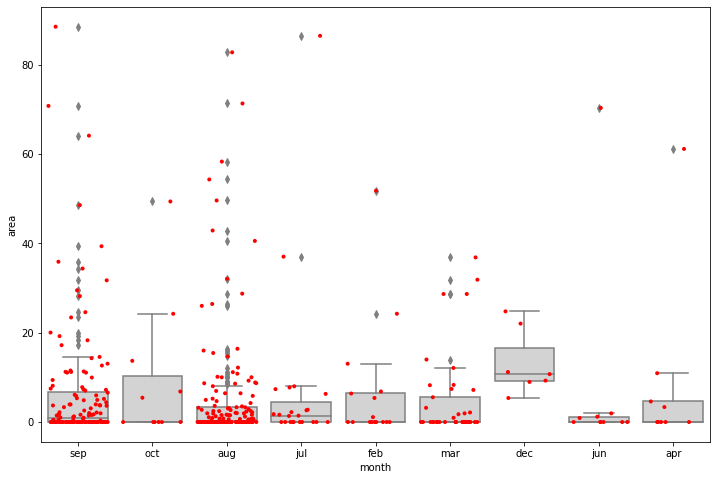

In [25]:
#December had a few incidents but all on the higher burnt area side. Is it becuase dry weather or because more tourists? 
ax = plt.figure(figsize=(12,8))
ax = sns.boxplot(x='month', y='area', data=forest_fire, color='lightgrey', )
ax = sns.stripplot(x='month', y='area', data=forest_fire, color='red', jitter=0.4, size=4)


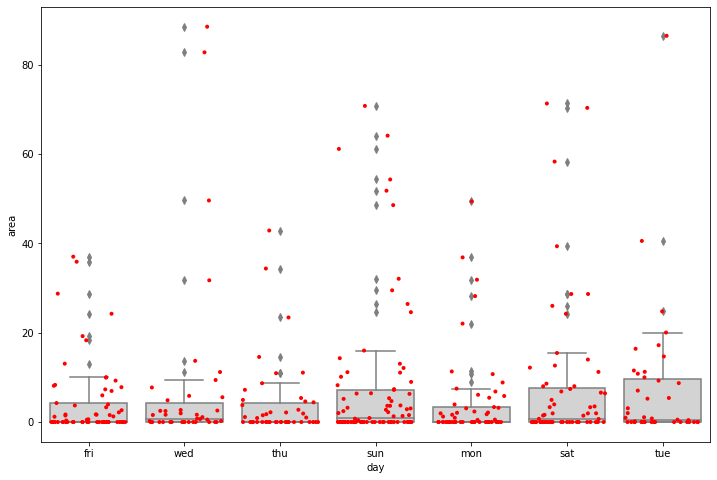

In [26]:
#There are more incidents on weekends - Friday/Sat/Sun, it might mean that campers vactioning might have caused/spotted fires.
ax = plt.figure(figsize=(12,8))
ax = sns.boxplot(x='day', y='area', data=forest_fire, color='lightgrey', )
ax = sns.stripplot(x='day', y='area', data=forest_fire, color='red', jitter=0.4, size=4)

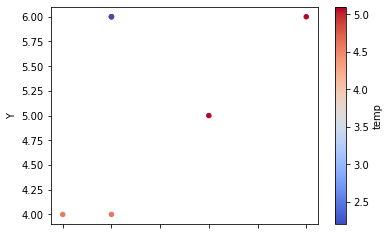

In [27]:
#I am checking the temparature distribution as per the forest cordinates during the month of december
#it looks like the temps are low, so it could be a combinaton of dry weather and human made fire. But as data scientists,
#we must make important discoveries to arrive at any conclusive evidence. Else the above statments are just my mind made 
#fantsies
forest_fire[forest_fire.month=='dec'].plot(kind='scatter', x='X', y='Y', c='temp', cmap=plt.get_cmap('coolwarm'), colorbar=True)
plt.show()

In [28]:
corr_matrix = forest_fire.corr(method='spearman')
corr_matrix


,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
X,1.000000,0.481958,-0.070838,-0.082882,-0.097020,0.003760,-0.060757,0.081566,0.016699,0.106047,0.038364
Y,0.481958,1.000000,-0.037203,0.006697,-0.116588,-0.050865,-0.047194,0.075483,-0.056825,0.065329,0.062555
FFMC,-0.070838,-0.037203,1.000000,0.496427,0.239290,0.791981,0.594014,-0.337973,-0.031399,0.116047,0.022730
DMC,-0.082882,0.006697,0.496427,1.000000,0.562753,0.394178,0.468887,0.043702,-0.098967,0.166716,0.026109
DC,-0.097020,-0.116588,0.239290,0.562753,1.000000,0.082584,0.274941,0.050014,-0.157062,0.033104,0.036140
ISI,0.003760,-0.050865,0.791981,0.394178,0.082584,1.000000,0.406165,-0.171347,0.128069,0.133786,0.019129
temp,-0.060757,-0.047194,0.594014,0.468887,0.274941,0.406165,1.000000,-0.551008,-0.184548,0.056701,0.048286
RH,0.081566,0.075483,-0.337973,0.043702,0.050014,-0.171347,-0.551008,1.000000,0.100768,0.187838,-0.043599
wind,0.016699,-0.056825,-0.031399,-0.098967,-0.157062,0.128069,-0.184548,0.100768,1.000000,0.146433,0.049758
rain,0.106047,0.065329,0.116047,0.166716,0.033104,0.133786,0.056701,0.187838,0.146433,1.000000,-0.056283


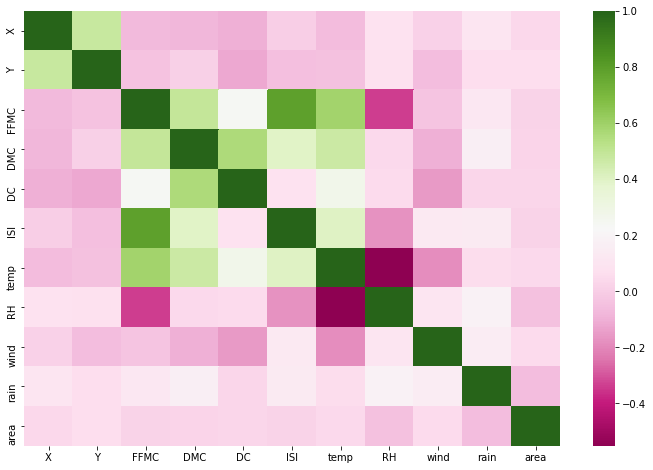

In [29]:
ax = plt.figure(figsize=(12,8))
ax = sns.heatmap(corr_matrix, cmap='PiYG')



In [30]:
#corrleation with area
corr_matrix.area.sort_values(ascending=False)



area    1.000000
Y       0.062555
wind    0.049758
temp    0.048286
X       0.038364
DC      0.036140
DMC     0.026109
FFMC    0.022730
ISI     0.019129
RH     -0.043599
rain   -0.056283
Name: area, dtype: float64

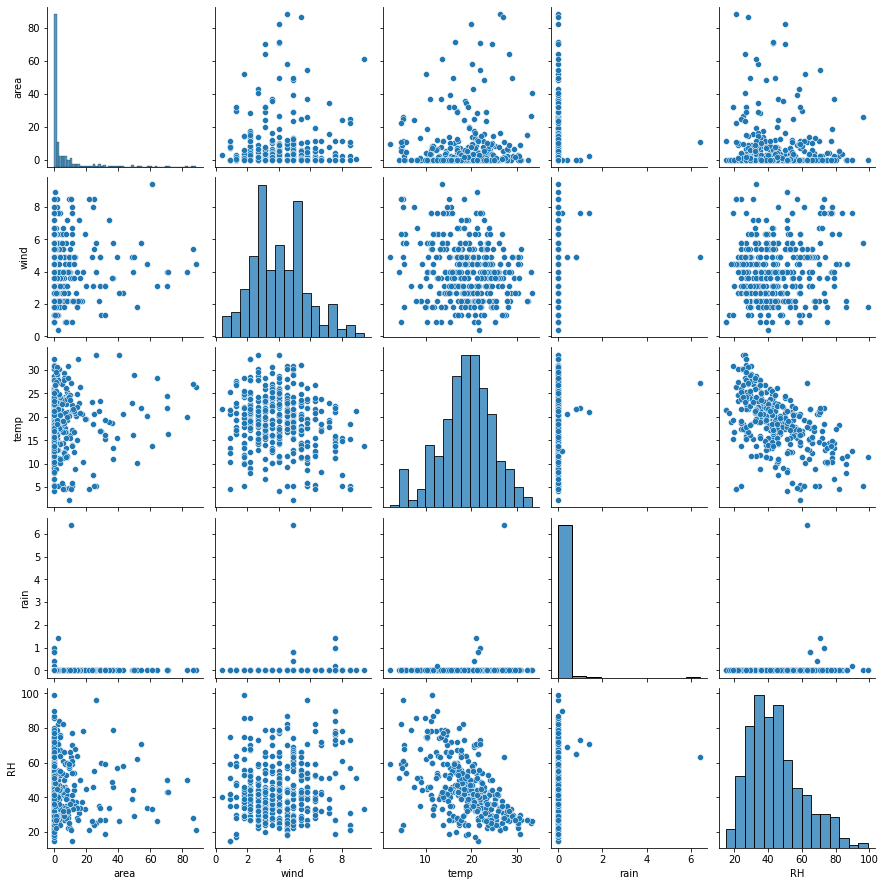

In [31]:
#visualizing relations of most related attributes
attributes = ['area', 'wind', 'temp', 'rain', 'RH']
sns.pairplot(forest_fire[attributes])
plt.show()



In [32]:
#create a fresh copy of train to preprocess
forest_fire = st_train_set.drop('area', axis=1)
forest_fire_labels = st_train_set.area.copy()

In [36]:
from sklearn.base import BaseEstimator, TransformerMixin

class AttributeDeleter(BaseEstimator, TransformerMixin):
    def __init__(self, delete=True):
        self.delete = delete
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        return np.delete(X,[data.columns.get_loc(i) for i in['X','Y','area']],axis=1)
            

In [37]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

categorical_attributes = list(forest_fire.select_dtypes(include=['object']).columns)
numerical_attributes = list(forest_fire.select_dtypes(include=['float64', 'int64']).columns)

num_pipeline = Pipeline([('imputer', SimpleImputer(strategy='median')),
                         ('drop_attributes', AttributeDeleter()),
                         ('std_scaler', StandardScaler()),
                        ])
full_pipeline = ColumnTransformer([('num', num_pipeline, numerical_attributes),
                                   ('cat', OneHotEncoder(), categorical_attributes),
                                  ])

train = full_pipeline.fit_transform(forest_fire)
train_labels = forest_fire_labels
train.shape ,forest_fire.shape



<ipython-input-36-d31f347cf15a>:9: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.
  return np.delete(X,[data.columns.get_loc(i) for i in['X','Y','area']],axis=1)


((400, 24), (400, 12))

In [38]:
#check the train data
train_df = pd.DataFrame(train, columns= numerical_attributes[2:] + list(full_pipeline.named_transformers_.cat.categories_[0]) +
             list(full_pipeline.named_transformers_.cat.categories_[1]))
train_df.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,apr,aug,...,mar,oct,sep,fri,mon,sat,sun,thu,tue,wed
0,0.380715,0.142619,0.956717,0.231093,0.367208,-0.334216,-1.038205,-0.0819,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.403202,0.041644,0.905476,-0.065316,0.125964,-0.209799,-1.265975,-0.0819,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.133351,-1.144046,0.485378,-0.827509,0.212122,-0.458633,-0.753492,-0.0819,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.448178,0.096722,0.931503,-0.340552,0.453366,-1.018511,1.296439,-0.0819,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.136500,-0.200083,0.312134,-0.594617,0.436134,-0.645259,-1.038205,-0.0819,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_reg = LinearRegression()
lin_reg.fit(train, train_labels)

area_predictions = lin_reg.predict(train)
lin_mse = mean_squared_error(train_labels, area_predictions)
lin_rmse = np.sqrt(lin_mse)
print('linear_train_rmse', lin_rmse) #model might be underfitting

from sklearn.model_selection import cross_val_score
scores = cross_val_score(lin_reg, train, train_labels, scoring='neg_mean_squared_error', cv=10)
lin_rmse_scores = np.sqrt(-scores)

def explain_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
 
explain_scores(lin_rmse_scores)

linear_train_rmse 13.406066943162292
Scores: [16.00586989 11.91154919 13.54246624 17.79622565 11.00732733 16.2702517
 12.44362983 12.5315639  20.86146544  9.50023542]
Mean: 14.187058460095466
Standard deviation: 3.2965468733960823


In [40]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(train, train_labels)

area_predictions = tree_reg.predict(train)
tree_mse = mean_squared_error(train_labels, area_predictions)
tree_rmse = np.sqrt(tree_mse)
print('tree_train_rmse', tree_rmse) #model obviously overfitting

scores = cross_val_score(tree_reg, train, train_labels, scoring='neg_mean_squared_error', cv=10)
tree_rmse_scores = np.sqrt(-scores)
explain_scores(tree_rmse_scores)



tree_train_rmse 3.741321429878308
Scores: [16.30482806 26.6548144  18.92146572 20.06757668 13.45367991 20.80439034
 17.46536977 20.5491725  23.71631472 19.83376773]
Mean: 19.77713798374692
Standard deviation: 3.502540477544121


In [41]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor()
rf_reg.fit(train, train_labels)

area_predictions = rf_reg.predict(train)
rf_mse = mean_squared_error(train_labels, area_predictions)
rf_rmse = np.sqrt(rf_mse)
print('rf_train_rmse', rf_rmse) #model is overfitting 

scores = cross_val_score(rf_reg, train, train_labels, scoring='neg_mean_squared_error', cv=10)
rf_rmse_scores = np.sqrt(-scores)
explain_scores(rf_rmse_scores)



rf_train_rmse 6.499644935805323
Scores: [15.46909982 17.41186421 13.47962685 17.90634077 12.14330828 17.21779786
 12.58733481 13.20913793 21.3827724  13.38102369]
Mean: 15.41883066338183
Standard deviation: 2.837421831177576


In [42]:
from sklearn.svm import SVR

svm_reg = SVR(kernel='linear')
svm_reg.fit(train, train_labels)

area_predictions = svm_reg.predict(train)
svm_mse = mean_squared_error(train_labels, area_predictions)
svm_rmse = np.sqrt(svm_mse)
print('svm_train_rmse', svm_rmse) #svm is generalizing well to crossvalidation set

scores = cross_val_score(svm_reg, train, train_labels, scoring='neg_mean_squared_error', cv=10)
svm_rmse_scores = np.sqrt(-scores)
explain_scores(svm_rmse_scores)

svm_train_rmse 14.735115234995622
Scores: [16.28880513 11.46486514 13.32923098 18.72966492 12.30643604 17.79038955
 11.83843457 11.58292376 21.51711382  8.19307306]
Mean: 14.304093696230833
Standard deviation: 3.8927844078190823


In [43]:
from sklearn.neighbors import KNeighborsRegressor

knn_reg = KNeighborsRegressor()
knn_reg.fit(train, train_labels)

area_predictions = knn_reg.predict(train)
knn_mse = mean_squared_error(train_labels, area_predictions)
knn_rmse = np.sqrt(knn_mse)
print('knn_train_rmse', knn_rmse) #overfiiting

scores = cross_val_score(knn_reg, train, train_labels, scoring='neg_mean_squared_error', cv=10)
knn_rmse_scores = np.sqrt(-scores)
explain_scores(knn_rmse_scores)


knn_train_rmse 12.267501416343917
Scores: [15.32853266 13.30199007 14.2548204  18.26040729 13.00551996 17.07379813
 12.83996789 12.84801573 21.90707942 11.81003484]
Mean: 15.063016639221294
Standard deviation: 2.9932590410023514


In [44]:
#lets improve the models with hyperparameter tuning

from sklearn.model_selection import GridSearchCV

param_grid = [{'bootstrap':[False,True],'n_estimators':[75,100,125,150,200], 'max_features':[1,2,4,6]}]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

grid_search.fit(train, train_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'bootstrap': [False, True],
                          'max_features': [1, 2, 4, 6],
                          'n_estimators': [75, 100, 125, 150, 200]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [45]:
grid_search.best_params_ 


{'bootstrap': True, 'max_features': 1, 'n_estimators': 200}

In [46]:
grid_search.best_estimator_

RandomForestRegressor(max_features=1, n_estimators=200)

In [47]:
feature_importances = grid_search.best_estimator_.feature_importances_
attributes = numerical_attributes + list(full_pipeline.named_transformers_.cat.categories_[0]) +\
             list(full_pipeline.named_transformers_.cat.categories_[1])
    
sorted(zip(feature_importances, attributes), reverse=True)

[(0.1676549940071283, 'DC'),
 (0.14409387915297978, 'ISI'),
 (0.11290112335904044, 'temp'),
 (0.10758754251142415, 'Y'),
 (0.10551990700485712, 'FFMC'),
 (0.09802649723965119, 'DMC'),
 (0.09141956456083705, 'X'),
 (0.02131984536579937, 'thu'),
 (0.017712104621612105, 'mon'),
 (0.016955671588268998, 'fri'),
 (0.016579610909216544, 'rain'),
 (0.014262151675355368, 'feb'),
 (0.013080155370046921, 'sun'),
 (0.01251672146192318, 'mar'),
 (0.012434745103558324, 'dec'),
 (0.009959656725793454, 'oct'),
 (0.007613930060811101, 'sep'),
 (0.007591906832877811, 'sat'),
 (0.005457861396289575, 'jul'),
 (0.005137983478699679, 'wind'),
 (0.004542862778078483, 'jun'),
 (0.0037062887797428773, 'aug'),
 (0.002016347559291545, 'apr'),
 (0.001908648456716647, 'RH')]

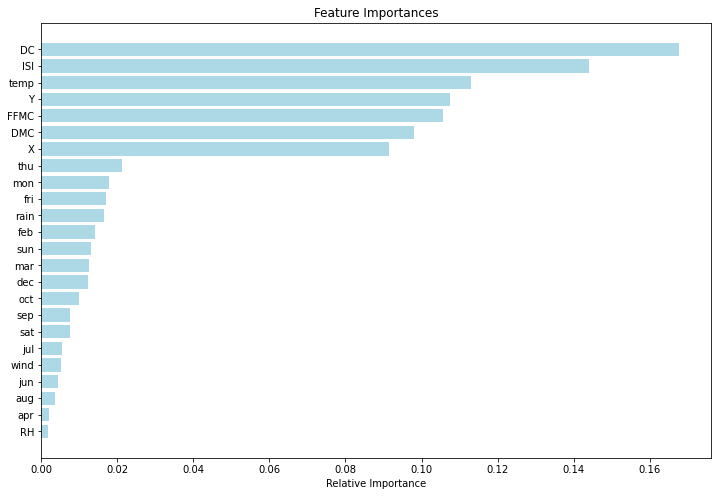

In [48]:
indices = np.argsort(feature_importances)
plt.figure(figsize=(12,8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), feature_importances[indices], color='lightblue', align='center')
plt.yticks(range(len(indices)), [attributes[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [49]:


#lets try with RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {'n_estimators': randint(low=10, high=250),
              'max_features': randint(low=1, high=24),
             }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_dist, n_iter=40, cv=5, scoring='neg_mean_squared_error', random_state=42)

rnd_search.fit(train, train_labels)



RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=40,
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f533eb52c40>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f533a2a6d30>},
                   random_state=42, scoring='neg_mean_squared_error')

In [50]:
rnd_search.best_params_


{'max_features': 3, 'n_estimators': 159}

In [51]:
np.sqrt(-rnd_search.best_score_), np.sqrt(-grid_search.best_score_) #both have very similar scores even though they came up with 
#different best parameters. which one to use, I leave to you explain



(14.801018452125936, 14.812723694003793)

In [52]:
#tuning svr

param_grid = [{'kernel': ['linear'], 'C':[0.5,1,5,10,30]},
              {'kernel':['rbf'], 'C':[5,10,15,20], 'gamma':[0.5,1.0,1.5,2.0]},
             ]

svm_reg = SVR()
grid_search = GridSearchCV(svm_reg, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=4)
grid_search.fit(train,train_labels)

negative_mse = grid_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse


Fitting 5 folds for each of 21 candidates, totalling 105 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  68 tasks      | elapsed:    2.0s
[Parallel(n_jobs=4)]: Done 105 out of 105 | elapsed:    2.1s finished


14.279091003310288

In [53]:
grid_search.best_params_

{'C': 10, 'gamma': 1.5, 'kernel': 'rbf'}

In [54]:


from scipy.stats import expon, reciprocal

param_dist = {'kernel':['linear','rbf'],
                  'C':reciprocal(1,100),
                  'gamma':expon(scale=1.0)}
svm_reg = SVR()
rnd_search = RandomizedSearchCV(svm_reg, param_distributions=param_dist, n_iter=100, cv=5,
                               scoring='neg_mean_squared_error', verbose=2, n_jobs=4, random_state=42)
rnd_search.fit(train, train_labels)

negative_mse = rnd_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse



Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 128 tasks      | elapsed:    2.9s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:   11.9s finished


14.28735230275134

In [55]:
rnd_search.best_params_ #randomized search is able to find better parameters for rbf kernel in same number of iterations

{'C': 10.414253710293567, 'gamma': 1.0115156153275293, 'kernel': 'rbf'}

In [56]:
def indices_top_features(impotance, top):
    return np.sort(np.argpartition(np.array(impotance), -top)[-top:])

class TopFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_importnaces, top):
        self.feature_importnaces = feature_importances
        self.top = top
    def fit(self, X, y=None):
        self.feature_indcies_ = indices_top_features(self.feature_importnaces, self.top)
        return self
    def transform(self,X):
        return X[:, self.feature_indcies_]



In [57]:
data_prep_feature_seletion_pipe = Pipeline([('prep', full_pipeline),
                                            ('fe_select', TopFeatureSelector(feature_importances,5)) #here am choosing top 5 features you can choose others depending on 
                                           ])                                                        #on what you want to keep  



In [58]:
train_fe_selected = data_prep_feature_seletion_pipe.fit_transform(forest_fire)
train_fe_selected.shape

<ipython-input-36-d31f347cf15a>:9: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.
  return np.delete(X,[data.columns.get_loc(i) for i in['X','Y','area']],axis=1)


(400, 5)

In [59]:
#now let's try knn with these reduced dimensions 

knn_reg = KNeighborsRegressor()
knn_reg.fit(train_fe_selected, train_labels)

area_predictions = knn_reg.predict(train_fe_selected)
knn_mse = mean_squared_error(train_labels, area_predictions)
knn_rmse = np.sqrt(knn_mse)
print('knn_train_rmse', knn_rmse) #knn is generalizing well to crossvalidation set

scores = cross_val_score(knn_reg, train_fe_selected, train_labels, scoring='neg_mean_squared_error', cv=10)
knn_rmse_scores = np.sqrt(-scores)
explain_scores(knn_rmse_scores)



knn_train_rmse 12.410643353186812
Scores: [15.82385426 13.66648182 14.32809107 19.03754417 12.9068144  17.30360238
 13.26014549 10.96969598 21.70251846  9.79899367]
Mean: 14.879774169263836
Standard deviation: 3.464077990130809


In [60]:
#lets tune KNN 
param_grid = {'weights': ['uniform', 'distance'], 'n_neighbors': list(range(1,36,5))}

knn_reg= KNeighborsRegressor()
knn_grid_search = GridSearchCV(knn_reg, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=4)
knn_grid_search.fit(train_fe_selected,train_labels)

knn_negative_mse = knn_grid_search.best_score_
knn_rmse = np.sqrt(-knn_negative_mse)
knn_rmse


Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  70 out of  70 | elapsed:    0.1s finished


14.12515060556197

In [61]:
#and for final model I want to try GBM
from xgboost import XGBRegressor

xgb_reg = XGBRegressor()
xgb_reg.fit(train_fe_selected, train_labels)

area_predictions = xgb_reg.predict(train_fe_selected)
xgb_mse = mean_squared_error(train_labels, area_predictions)
xgb_rmse = np.sqrt(xgb_mse)
print('xgb_train_rmse', xgb_rmse) #overfitting

scores = cross_val_score(xgb_reg, train_fe_selected, train_labels, scoring='neg_mean_squared_error', cv=10)
xgb_rmse_scores = np.sqrt(-scores)
explain_scores(xgb_rmse_scores)

xgb_train_rmse 3.7570886839347826
Scores: [15.7990063  21.8870192  14.44191762 18.604455   14.93293397 18.99703977
 13.71249506 13.84434741 23.46942714 14.14965525]
Mean: 16.983829672903596
Standard deviation: 3.3681672099526914


In [62]:
param_grid = {'objective':['reg:linear'],
              'learning_rate': [0.02,0.03,0.04], 
              'max_depth': [1,2],
              'min_child_weight': [2,3,4],
              'silent': [1],
              'subsample': [0.8],
              'colsample_bytree': [0.2,0.3,0.4],
              'n_estimators': [50,60,70,100]}

xgb_reg = XGBRegressor()

xgb_grid_search = GridSearchCV(xgb_reg, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=4)
xgb_grid_search.fit(train_fe_selected,train_labels)

xgb_negative_mse = grid_search.best_score_
xgb_rmse = np.sqrt(-xgb_negative_mse)
xgb_rmse



Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    1.2s


[10:44:09] WARNING: ../src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[10:44:09] WARNING: ../src/learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:44:09] WARNING: ../src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=4)]: Done 1080 out of 1080 | elapsed:    3.8s finished


14.279091003310288

In [63]:
xgb_grid_search.best_params_



{'colsample_bytree': 0.2,
 'learning_rate': 0.03,
 'max_depth': 1,
 'min_child_weight': 2,
 'n_estimators': 70,
 'objective': 'reg:linear',
 'silent': 1,
 'subsample': 0.8}

In [64]:
final_model = knn_grid_search.best_estimator_

X_test = st_test_set.drop(['area'], axis=1)
y_test = st_test_set['area'].copy()

X_test_prepared = data_prep_feature_seletion_pipe.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

<ipython-input-36-d31f347cf15a>:9: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.
  return np.delete(X,[data.columns.get_loc(i) for i in['X','Y','area']],axis=1)


13.5845575382228

In [65]:
prepare_select_and_predict_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, 5)),
    ('final_model', XGBRegressor(**xgb_grid_search.best_params_))
])


In [66]:
prepare_select_and_predict_pipeline.fit(forest_fire,forest_fire_labels)



[10:45:31] WARNING: ../src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[10:45:31] WARNING: ../src/learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:45:31] WARNING: ../src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


<ipython-input-36-d31f347cf15a>:9: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.
  return np.delete(X,[data.columns.get_loc(i) for i in['X','Y','area']],axis=1)


Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('drop_attributes',
                                                                   AttributeDeleter()),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['X', 'Y', 'FFMC', 'DMC',
                                                   'DC', 'ISI', 'temp', 'RH',
                                                   'wind', 'rain']),
                                                 ('cat', OneHotEncoder(),
                                                  ['month', 'day'])])),
                ('f

In [67]:
final_predictions = prepare_select_and_predict_pipeline.predict(X_test)

<ipython-input-36-d31f347cf15a>:9: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.
  return np.delete(X,[data.columns.get_loc(i) for i in['X','Y','area']],axis=1)


In [68]:
some_data = forest_fire[:4]
some_labels = forest_fire_labels[:4]

print("Predictions:\t", prepare_select_and_predict_pipeline.predict(some_data))
print("Labels:\t\t", list(some_labels))

Predictions:	 [4.5554733 4.5554733 4.705267  5.3368034]
Labels:		 [8.12, 1.58, 13.7, 4.41]


<ipython-input-36-d31f347cf15a>:9: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.
  return np.delete(X,[data.columns.get_loc(i) for i in['X','Y','area']],axis=1)


In [69]:
#Confidence Interval of our Predictions will help us better understand the ouput of our model
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions-y_test)**2
np.sqrt(stats.t.interval(confidence, len(squared_errors)-1, loc=squared_errors.mean(), scale=stats.sem(squared_errors)))



array([ 4.7743105, 18.7834699])